In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1. Read the tips dataset from the provided source only. Handle the missing values with the appropriate techniques.

In [2]:
df=pd.read_csv('D:/sem-6/ML-Lab/week-3/tips.csv')

In [3]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,NaN,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [5]:
df.isnull().sum().sum()

39

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  205 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [7]:
df['total_bill'].isnull().sum()

39

In [8]:
df.notnull().sum()

Unnamed: 0    244
total_bill    205
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [9]:
df.notnull().sum().sum()

1913

In [10]:
df['total_bill'].notnull().sum()

205

In [11]:
df['total_bill'].mean()

21.36019512195122

In [12]:
df.isnull().mean()

Unnamed: 0    0.000000
total_bill    0.159836
tip           0.000000
sex           0.000000
smoker        0.000000
day           0.000000
time          0.000000
size          0.000000
dtype: float64

In [13]:
df.isna().sum()

Unnamed: 0     0
total_bill    39
tip            0
sex            0
smoker         0
day            0
time           0
size           0
dtype: int64

In [14]:
df['total_bill']=df['total_bill'].fillna(df['total_bill'].mean())

In [15]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [16]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
#2. Handle the categorical data in the tips dataset with the relevant approaches such as label- encoding, one hot encoding, ordinal encoding.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [18]:
from sklearn.preprocessing import OneHotEncoder
o=OneHotEncoder()

In [19]:
o.fit_transform(df[['sex','smoker','day','time']]).toarray()

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [ ]:
#3. Perform feature scaling techniques such as min-max normalization, standardization, z-score, on the tips dataset.

In [20]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [21]:
df_m=m.fit_transform(df[['total_bill','tip']])

In [23]:
d=pd.DataFrame(df_m,columns=['total_bill','tip'])
d.sample(5)

,total_bill,tip
104,0.373900,0.342222
160,0.386049,0.277778
121,0.216799,0.075556
26,0.215752,0.111111
8,0.250733,0.106667


(array([ 1.,  1., 10.,  5.,  0., 21., 27., 30., 15., 58., 14., 13.,  8.,
         7.,  8.,  5.,  6.,  1.,  3.,  4.,  1.,  1.,  1.,  3.,  1.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

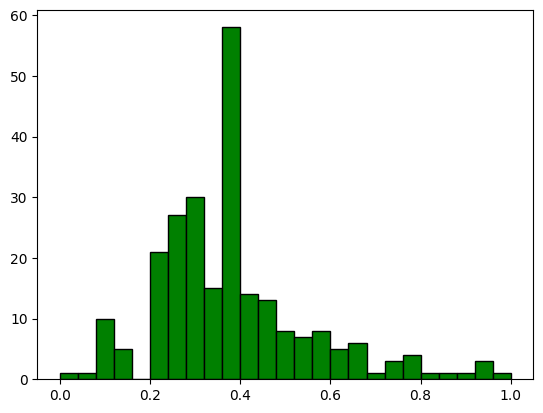

In [24]:
plt.hist(d['total_bill'],bins=25,color='green',edgecolor='black')

In [25]:
#standardization

In [26]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [27]:
df_s=s.fit_transform(df[['total_bill','tip']])
df_s

array([[-5.38971741e-01, -1.43994695e+00],
       [ 0.00000000e+00, -9.69205340e-01],
       [-4.31892099e-02,  3.63355539e-01],
       [ 2.86099188e-01,  2.25754144e-01],
       [ 3.98328567e-01,  4.43019505e-01],
       [ 4.84658858e-01,  1.23965916e+00],
       [-1.55273602e+00, -7.22971264e-01],
       [ 6.80751949e-01,  8.81527488e-02],
       [-7.79463267e-01, -7.51939979e-01],
       [-8.11528804e-01,  1.67816714e-01],
       [ 0.00000000e+00, -9.32994446e-01],
       [ 1.71424887e+00,  1.44968234e+00],
       [-7.32598252e-01, -1.03438495e+00],
       [-3.61377999e-01,  1.24660453e-03],
       [-8.05362355e-01,  1.57309619e-02],
       [ 2.71083131e-02,  6.67527044e-01],
       [ 0.00000000e+00, -9.61963161e-01],
       [-6.25302033e-01,  5.15441291e-01],
       [-5.41438321e-01,  3.63355539e-01],
       [-8.75876456e-02,  2.54722859e-01],
       [-4.24275782e-01,  7.83401903e-01],
       [-1.31986081e-01, -1.79807863e-01],
       [-6.89433106e-01, -5.56401155e-01],
       [ 2.

In [36]:
d.head(5)

,total_bill,tip
0,0.291579,0.001111
1,0.383121,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000


In [37]:
z=(d['total_bill']-d['total_bill'].mean())/d['total_bill'].std()
z

0     -5.378662e-01
1     -3.261640e-16
2     -4.310062e-02
3      2.855123e-01
4      3.975115e-01
           ...     
239    9.439689e-01
240    7.162783e-01
241    1.612056e-01
242   -4.357131e-01
243   -3.175601e-01
Name: total_bill, Length: 244, dtype: float64

In [ ]:
#4. Create a new feature representing the average tip percentage for each dining party size.

In [38]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.990000,1.01,Female,No,Sun,Dinner,2
1,1,21.360195,1.66,Male,No,Sun,Dinner,3
2,2,21.010000,3.50,Male,No,Sun,Dinner,3
3,3,23.680000,3.31,Male,No,Sun,Dinner,2
4,4,24.590000,3.61,Female,No,Sun,Dinner,4


In [39]:
df['avg_tip']=df.groupby('size')['tip'].transform('mean')
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip
0,0,16.990000,1.01,Female,No,Sun,Dinner,2,2.582308
1,1,21.360195,1.66,Male,No,Sun,Dinner,3,3.393158
2,2,21.010000,3.50,Male,No,Sun,Dinner,3,3.393158
3,3,23.680000,3.31,Male,No,Sun,Dinner,2,2.582308
4,4,24.590000,3.61,Female,No,Sun,Dinner,4,4.135405


In [ ]:
#5. Create a new feature based on total bill and tips if total bill is greater than 10$ and tips is greater than 3$ mark as Highest-bills-with-tips otherwise Normal-bills

In [42]:
def categorize(total_bill,tip):
    if total_bill>10 and tip>3:
        return 'Highest-bills-with-tips'
    else:
        return 'Normal-bills'
df['bill_category']=df.apply(lambda row:categorize(row['total_bill'],row['tip']),axis=1)

In [43]:
df.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,avg_tip,bill_category
0,0,16.990000,1.01,Female,No,Sun,Dinner,2,2.582308,Normal-bills
1,1,21.360195,1.66,Male,No,Sun,Dinner,3,3.393158,Normal-bills
2,2,21.010000,3.50,Male,No,Sun,Dinner,3,3.393158,Highest-bills-with-tips
3,3,23.680000,3.31,Male,No,Sun,Dinner,2,2.582308,Highest-bills-with-tips
4,4,24.590000,3.61,Female,No,Sun,Dinner,4,4.135405,Highest-bills-with-tips
